In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [83]:
df = pd.read_excel('/Users/xinyuyangren/Desktop/Ventilation_Position/ventbyseasons_2014.xlsx')
df

,Spring,Summer,Autumn,Winter,Mean,Std,RSD,label
1,1.290308,1.813774,1.350733,1.025463,1.370069,0.283885,0.207205,505
2,1.528018,1.350543,1.501374,1.206704,1.396660,0.128870,0.092270,505
3,1.159873,1.016304,1.073260,1.160689,1.102532,0.061160,0.055473,506
4,1.130888,1.397192,1.076465,1.002329,1.151718,0.148889,0.129275,505
5,1.003170,1.003623,1.962812,1.272052,1.310414,0.392305,0.299375,506
6,1.414402,1.906703,1.798993,1.580103,1.675050,0.191035,0.114047,505
7,1.075634,2.017663,2.018315,1.399440,1.627763,0.406673,0.249835,506
8,1.491395,2.101902,2.200370,1.558051,1.837929,0.316016,0.171941,506
9,1.039855,1.166667,1.174451,1.083101,1.116018,0.056710,0.050814,506
10,2.020380,2.003623,2.001374,2.038533,2.015978,0.014950,0.007416,505


(0.625, 11.125)

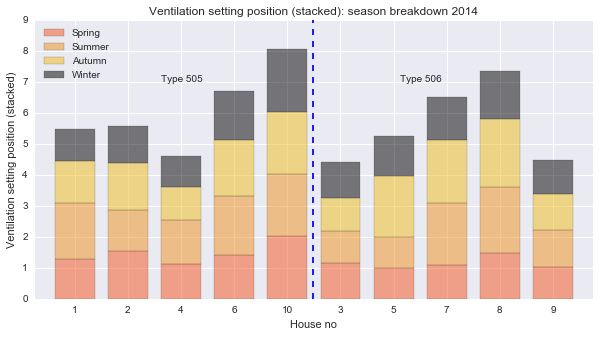

In [84]:
#Stacked bar plot
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

#ix[order] in order to plot 505 506 type seperately
order = [1,2,4,6,10,3,5,7,8,9]
# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df['Spring']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        df['Spring'].ix[order],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Spring',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the mid_score data
        df['Summer'].ix[order],
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=df['Spring'].ix[order],
        # with the label mid score
        label='Summer',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Autumn'].ix[order],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['Spring'].ix[order],df['Summer'].ix[order])],
        # with the label post score
        label='Autumn',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1BD1A')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Winter'].ix[order],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df['Spring'].ix[order],df['Summer'].ix[order],df['Autumn'].ix[order])],
        # with the label post score
        label='Winter',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='k')
# set the x ticks with names
plt.xticks(tick_pos, order)

# Set the label and legends
ax1.set_ylabel("Ventilation setting position (stacked)")
ax1.set_xlabel("House no")
plt.legend(loc='upper left')
plt.title('Ventilation setting position (stacked): season breakdown 2014')
plt.axvline(5.85,c = 'b',ls = 'dashed')
plt.annotate('Type 505',xy = (1,1) , xytext=(3, 7))
plt.annotate('Type 506',xy = (1,1) , xytext=(7.5,7))
# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

In [85]:
data = df[['Mean','Std']]
#data = data.drop(data.index[[5,7]])#drop the rows with too small means
data

,Mean,Std
1,1.370069,0.283885
2,1.396660,0.128870
3,1.102532,0.061160
4,1.151718,0.148889
5,1.310414,0.392305
6,1.675050,0.191035
7,1.627763,0.406673
8,1.837929,0.316016
9,1.116018,0.056710
10,2.015978,0.014950


In [86]:
from sklearn.preprocessing import scale
data = scale(data)

In [87]:
data

array([[-0.30082005,  0.62144176],
       [-0.21228149, -0.52762199],
       [-1.19164756, -1.02952624],
       [-1.0278693 , -0.37923136],
       [-0.49945521,  1.42511496],
       [ 0.71468214, -0.06682088],
       [ 0.55722908,  1.5316136 ],
       [ 1.25702588,  0.85960962],
       [-1.14674075, -1.06251692],
       [ 1.84987727, -1.37206255]])

In [88]:
estimator = KMeans(n_clusters=3)
estimator.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [89]:
labels = estimator.labels_
print estimator.labels_

[0 1 1 1 0 0 0 0 1 2]


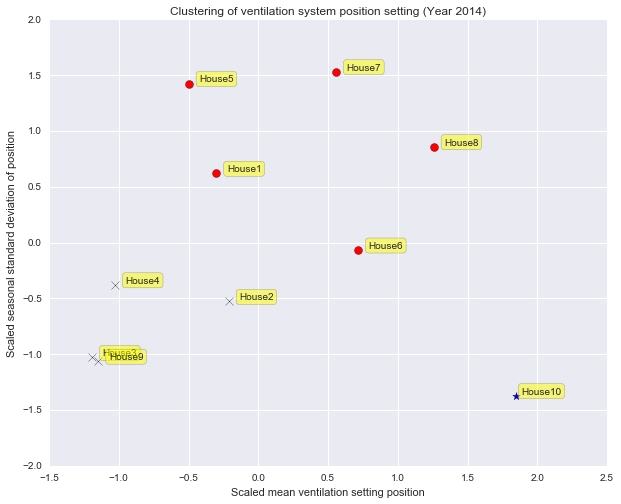

In [90]:
xs = data[:,0]
ys = data[:,1]
plt.figure(figsize=(10,8))
for i in range(0, len(labels)):
    if labels[i] == 0:
        c1 = plt.scatter(xs[i],ys[i],c='r',marker='o',s = 8*8)
    elif labels[i] == 1:
        c2 = plt.scatter(xs[i],ys[i],c='k',marker='x',s = 8*8)
    elif labels[i] == 2:
        c3 = plt.scatter(xs[i],ys[i],c='b',marker='*',s = 8*8)
    elif labels[i] == 3:
        c4 = plt.scatter(xs[i],ys[i],c='m',marker='^',s = 8*8)
#plt.legend([c1, c2, c3], ['Low ventilation flow rate/Low inter season variation', 'Medium ventilation flow rate/High inter season variation','High open duration/Medium inter season variation'])
plt.xlabel('Scaled mean ventilation setting position')
plt.ylabel('Scaled seasonal standard deviation of position')
plt.title('Clustering of ventilation system position setting (Year 2014)')

housenum = ['House{0}'.format(i) for i in range(1,11)]
for housenum, x, y in zip(housenum, xs, ys):
    plt.annotate(
        housenum, 
        xy = (x, y), xytext = (45, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.5))